In [37]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

# Graphs style
plt.style.use('ggplot')


In [38]:
# Generating a dataset (y_data are normally distributed!)
x_data = np.arange(0, 101, 1)
y_data= x_data + np.random.normal(0, 1, len(x_data))


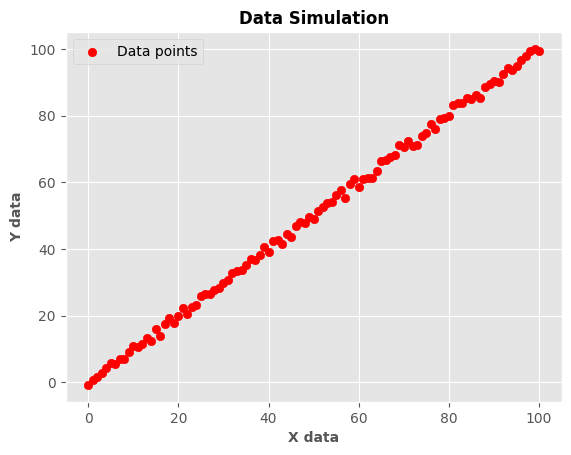

In [39]:
# Generating the data plot
plt.scatter(x_data, y_data, label= "Data points", color= "red")
plt.title("Data Simulation", fontweight= "bold", fontsize= 12)
plt.xlabel("X data", fontweight= "bold", fontsize= 10)
plt.ylabel("Y data", fontweight= "bold", fontsize= 10)
plt.legend()

In [40]:
# Fitting data
def F(x, m, q):
    return m * x + q

initial_guess = [1, 0.01]

popt, pcov = curve_fit(F, x_data, y_data, p0= initial_guess) 
errors = np.sqrt(np.diag(pcov))

residual = F(x_data, *popt) - y_data 
sum_residuals = np.sum((residual) ** 2) 
absolute_sum_residuals = np.sum(np.abs(residual))
dof = len(x_data) - 2
reduced_chi = sum_residuals / dof

print("Value of m: {} +- {}".format(popt[0], errors[0]))
print("Value of q: {} +- {}".format(popt[1], errors[1]))
print("Covariance matrix: ", pcov)
print("Sum of squared residuals: ", sum_residuals)
print("Sum of absolute residuals: ", absolute_sum_residuals)
print("Degrees of freedom: ", dof)
print("Reduced chi-squared: ", reduced_chi)

Value of m: 1.0069708530865584 +- 0.00326234784285142
Value of q: -0.20934470879514847 +- 0.18882223430913253
Covariance matrix:  [[ 1.06429134e-05 -5.32145869e-04]
 [-5.32145869e-04  3.56538362e-02]]
Sum of squared residuals:  90.45608850443061
Sum of absolute residuals:  76.78419803056771
Degrees of freedom:  99
Reduced chi-squared:  0.9136978636811173


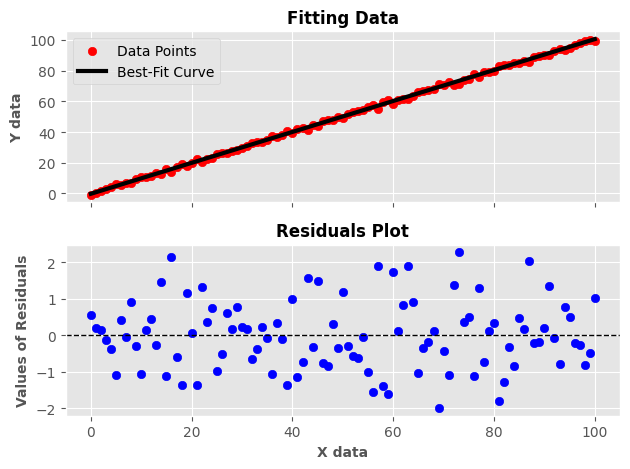

In [41]:
# Generating the residuals plot
x = np.linspace(0, 100, 10000)

fig, (ax1, ax2) = plt.subplots(2, sharex= True)

ax1.scatter(x_data, y_data, label= "Data Points", color= "red")
ax1.plot(x, F(x, *popt), label= "Best-Fit Curve", color= "black", linewidth= 3)
ax1.set_ylabel("Y data", fontweight= "bold", fontsize= 10)
ax1.set_title("Fitting Data", fontweight= "bold", fontsize= 12)
ax1.legend()

ax2.scatter(x_data, residual, label= "Residuals", color= "blue")
ax2.set_xlabel("X data", fontweight= "bold", fontsize= 10)
ax2.set_ylabel("Values of Residuals", fontweight= "bold", fontsize= 10)
ax2.axhline(0, color= "black", linestyle= "--", linewidth= 1)
ax2.set_title('Residuals Plot', fontweight= "bold", fontsize= 12)

plt.tight_layout()

Math says if $N$ independent random variables $x_k$ are normally distributed, then the following sum:

$$ \sum_{k = 0}^N x_k^2 $$

follows the $\chi^2$ distribution with $N - p$ degrees of freedom, where $p$ is the total number of model parameters.

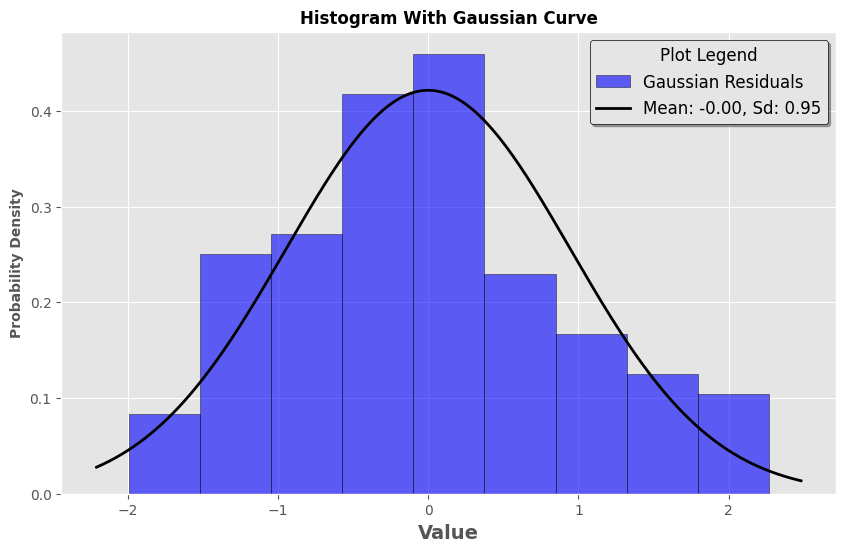

In [42]:
# Generating the histogramm of residuals
mean = np.mean(residual)
stddev = np.std(residual)

plt.figure(figsize=(10, 6))
plt.hist(residual, bins='auto', density=True, alpha=0.6, color='blue', edgecolor='black', label='Gaussian Residuals')

# Plotting the Gaussian curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mean, stddev)
plt.plot(x, p, color='black', linewidth=2, label=f"Mean: {mean:.2f}, Sd: {stddev:.2f}")

# Adding labels and title
plt.title('Histogram With Gaussian Curve', fontweight='bold', fontsize= 12)
plt.xlabel('Value', fontweight='bold', fontsize= 14)
plt.ylabel('Probability Density', fontweight='bold', fontsize= 10)
plt.legend(loc='upper right', shadow=True, frameon=True, edgecolor='black', fontsize=12, title="Plot Legend", title_fontsize=12)